In [16]:
#move back to the root directory
import os
os.chdir('..')

In [17]:
!pwd

/Users/charlesc/Documents/GitHub/ERP_tools


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


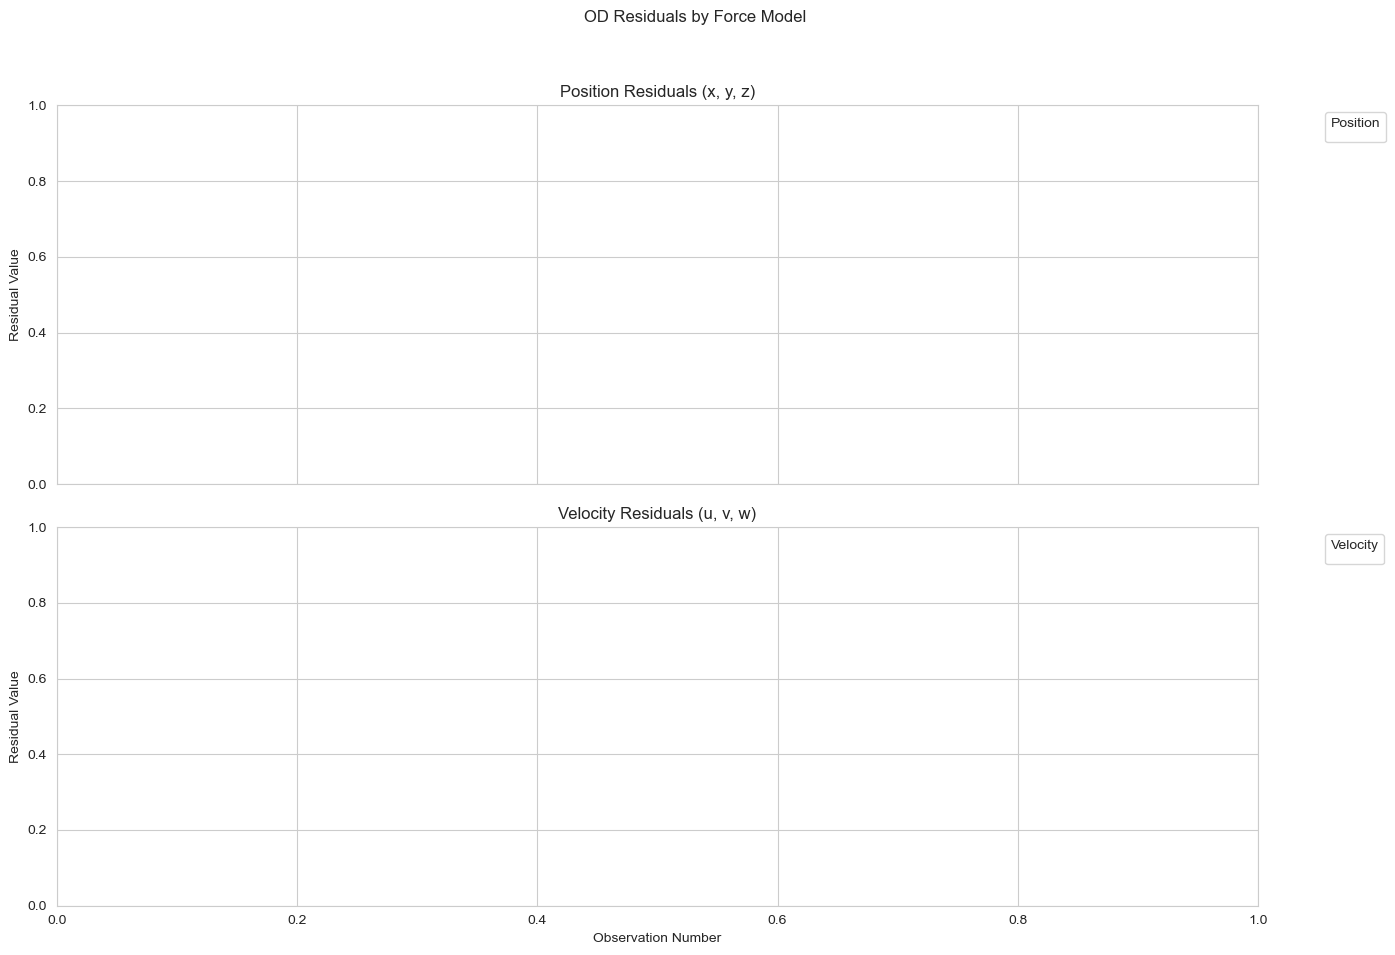

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Base folder path and satellites to test
base_folder_path = "output/OD_BLS/Tapley/saved_runs"
sat_names_to_test = ["GRACE-FO-A", "GRACE-FO-B", "TerraSAR-X", "TanDEM-X"]

# Prepare the plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('OD Residuals by Force Model')

# Define colors and labels for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
position_labels = ['x', 'y', 'z']
velocity_labels = ['u', 'v', 'w']

# Function to extract force model number from directory name
def extract_fm_number(dir_name):
    match = re.search(r'fm(\d+)', dir_name)
    if match:
        return int(match.group(1))
    else:
        return None

# Loop through each satellite and its subdirectories to find and plot OD residuals
for sat_name in sat_names_to_test:
    sat_folder_path = os.path.join(base_folder_path, sat_name)
    
    # Walk through the satellite's directory to find all RMSs.npy and corresponding ODresiduals.npy files
    for root, dirs, files in os.walk(sat_folder_path):
        if 'RMSs.npy' in files:
            fmodel_number = extract_fm_number(root)
            if fmodel_number is not None:
                color = colors[(fmodel_number - 1) % len(colors)]
                label = f'FM {fmodel_number}'
                
                # Load RMS and OD residuals
                RMSs_path = os.path.join(root, 'RMSs.npy')
                residuals_path = os.path.join(root, 'ODresiduals.npy')
                
                RMSs = np.load(RMSs_path)
                od_residuals = np.load(residuals_path)
                min_RMS_index = np.argmin(RMSs)
                selected_residuals = od_residuals[min_RMS_index]

                # Plot position residuals
                for i, label in enumerate(position_labels):
                    axs[0].plot(selected_residuals[:, i], label=f'{label} {fmodel_number}', color=color)
                
                # Plot velocity residuals
                for i, label in enumerate(velocity_labels, start=3):
                    axs[1].plot(selected_residuals[:, i], label=f'{label} {fmodel_number}', color=color)

# Configure subplots and legends
axs[0].set_title('Position Residuals (x, y, z)')
axs[1].set_title('Velocity Residuals (u, v, w)')
axs[1].set_xlabel('Observation Number')
axs[0].set_ylabel('Residual Value')
axs[1].set_ylabel('Residual Value')
axs[0].legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Velocity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Satellite GRACE-FO-A, Arc 1, RMS went from 0.2556967052876375 to 0.23866721498610716 - % change of 6.66
Satellite GRACE-FO-A, Arc 1, RMS went from 0.23866721498610716 to 0.2383191167028603 - % change of 0.15
Satellite GRACE-FO-A, Arc 1, RMS went from 0.2383191167028603 to 0.237826572592379 - % change of 0.21
Satellite GRACE-FO-A, Arc 1, RMS went from 0.237826572592379 to 0.24211154120378325 - % change of -1.80
Satellite GRACE-FO-A, Arc 1, RMS went from 0.24211154120378325 to 0.03313773323090744 - % change of 86.31
Satellite GRACE-FO-A, Arc 1, RMS went from 0.03313773323090744 to 0.21116956630230937 - % change of -537.25
Satellite GRACE-FO-A, Arc 1, RMS went from 0.21116956630230937 to 0.22224291740761115 - % change of -5.24
Satellite GRACE-FO-A, Arc 2, RMS went from 0.003192476953797661 to 0.0026337339325630854 - % change of 17.50
Satellite GRACE-FO-A, Arc 2, RMS went from 0.0026337339325630854 to 0.0027935817420111377 - % change of -6.07
Satellite GRACE-FO-A, Arc 3, RMS went from 0.00

/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_21661/2437018837.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Improvement', y='Force_Model_Transition', hue='Satellite', data=df_improvements, orient='h', palette=palette, ci=None)


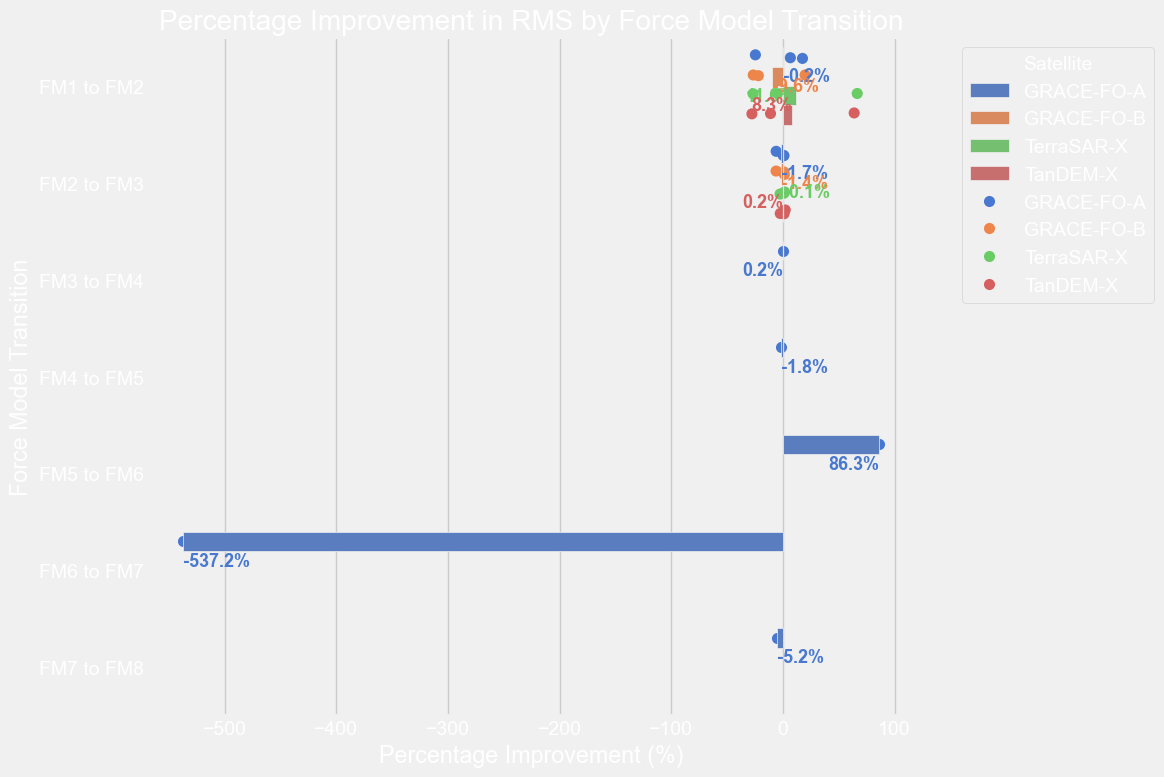

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from matplotlib import patheffects

# Base folder path and satellites
base_folder_path = "output/OD_BLS/Tapley/saved_runs"
sat_names_to_test = ["GRACE-FO-A", "GRACE-FO-B", "TerraSAR-X", "TanDEM-X"]

# Function to parse details from the folder name
def parse_folder_details(folder_name):
    fm_match = re.search(r'fm(\d+)', folder_name)
    arc_match = re.search(r'arc(\d+)', folder_name)
    fm = int(fm_match.group(1)) if fm_match else None
    arc = int(arc_match.group(1)) if arc_match else None
    return fm, arc

# Initialize list for data
improvements_data = []

# Process directories
for sat_name in sat_names_to_test:
    rms_values = {}  # (force_model, arc) : RMS

    for root, dirs, files in os.walk(os.path.join(base_folder_path, sat_name)):
        for file in files:
            if file == 'RMSs.npy':
                fm, arc = parse_folder_details(root)
                if fm and arc:
                    rms_path = os.path.join(root, file)
                    rms = np.min(np.load(rms_path))
                    rms_values[(fm, arc)] = rms

    sorted_keys = sorted(rms_values.keys(), key=lambda x: (x[1], x[0]))  # Sort by arc, then by FM for correct sequential processing
    for i in range(1, len(sorted_keys)):
        prev_key, curr_key = sorted_keys[i-1], sorted_keys[i]
        # Ensure the comparison is for the same arc and consecutive force models
        if prev_key[1] == curr_key[1] and curr_key[0] == prev_key[0] + 1:
            prev_rms, curr_rms = rms_values[prev_key], rms_values[curr_key]
            improvement = (prev_rms - curr_rms) / prev_rms * 100
            print(f"Satellite {sat_name}, Arc {curr_key[1]}, RMS went from {prev_rms} to {curr_rms} - % change of {improvement:.2f}")
            improvements_data.append({
                'Satellite': sat_name,
                'Force_Model_Transition': f'FM{prev_key[0]} to FM{curr_key[0]}',
                'Improvement': improvement
            })

# Create DataFrame
df_improvements = pd.DataFrame(improvements_data)

# Assuming df_improvements and the plot setup is as before

plt.figure(figsize=(12, 8))

# Define your color palette to match the number of satellites
palette = sns.color_palette("muted", n_colors=len(pd.unique(df_improvements['Satellite'])))

# Create the barplot
barplot = sns.barplot(x='Improvement', y='Force_Model_Transition', hue='Satellite', data=df_improvements, orient='h', palette=palette, ci=None)

#add stripplot
sns.stripplot(x='Improvement', y='Force_Model_Transition', hue='Satellite', data=df_improvements, orient='h', palette=palette, dodge=True, size=8, alpha=1, zorder=0)
# Customizing the legend properly
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Satellite', bbox_to_anchor=(1.05, 1), loc='upper left')

# Find unique force model transitions and satellites
force_model_transitions = df_improvements['Force_Model_Transition'].unique()
satellites = df_improvements['Satellite'].unique()

# Iterate through each force model transition
for i, transition in enumerate(force_model_transitions):
    # Filter the DataFrame for this transition
    transition_data = df_improvements[df_improvements['Force_Model_Transition'] == transition]
    # Calculate the base y-position for this transition's bars
    base_y_pos = i
    
    # Iterate through each satellite to place annotations
    for j, satellite in enumerate(satellites):
        satellite_data = transition_data[transition_data['Satellite'] == satellite]
        if not satellite_data.empty:
            # Calculate the average improvement for this satellite and transition
            avg_improvement = satellite_data['Improvement'].mean()
            # Adjust y-position for the specific satellite's bar within the group
            adjusted_y_pos = base_y_pos - 0.1 + (0.4 * j / len(satellites))
            # Annotate
            plt.text(avg_improvement, adjusted_y_pos, f'{avg_improvement:.1f}%', color=palette[j], ha='left' if avg_improvement < 0 else 'right', va='center', fontsize=13, fontweight='bold')

plt.title('Percentage Improvement in RMS by Force Model Transition')
plt.xlabel('Percentage Improvement (%)')
plt.ylabel('Force Model Transition')

plt.tight_layout()
plt.show()

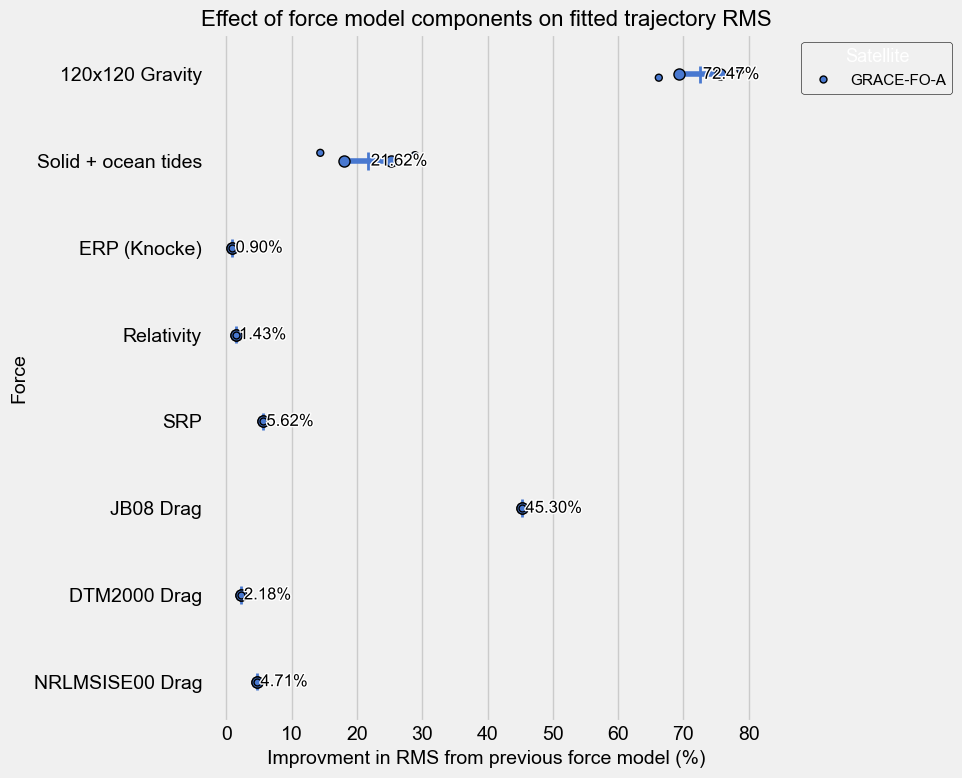

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from matplotlib import patheffects

base_folder_path = "output/OD_BLS/Tapley/saved_runs"
sat_names_to_test = ["GRACE-FO-A", "GRACE-FO-B", "TerraSAR-X", "TanDEM-X"]

force_model_steps = [
    {'36x36 Gravity+3BP': True},
    {'120x120 Gravity': True},
    {'Solid + ocean tides': True},
    {'ERP (Knocke)': True},
    {'Relativity': True},
    {'SRP': True},
    {'JB08 Drag': True},
    {'DTM2000 Drag': True},
    {'NRLMSISE00 Drag': True}
]

def parse_folder_details(folder_name):
    fm_match = re.search(r'fm(\d+)', folder_name)
    arc_match = re.search(r'arc(\d+)', folder_name)
    fm = int(fm_match.group(1)) if fm_match else None
    arc = int(arc_match.group(1)) if arc_match else None
    return fm, arc

rms_values = {}
for sat_name in sat_names_to_test:
    sat_folder = os.path.join(base_folder_path, sat_name)
    for root, dirs, files in os.walk(sat_folder):
        for file in files:
            if file.endswith('RMSs.npy'):
                fm, arc = parse_folder_details(root)
                rms = np.load(os.path.join(root, file)).min()
                rms_values[(sat_name, arc, fm)] = rms

improvements_data = []
for sat_name in sat_names_to_test:
    for arc in set(key[1] for key in rms_values if key[0] == sat_name):
        base_rms = None
        for fm in range(1, 10):
            key = (sat_name, arc, fm)
            if key in rms_values:
                if fm <= 6:
                    base_rms = rms_values[key]
                improvement = 0
                if fm == 1:
                    continue
                elif fm <= 6:
                    prev_key = (sat_name, arc, fm-1)
                    improvement = (rms_values[prev_key] - rms_values[key]) / rms_values[prev_key] * 100
                else:
                    improvement = (base_rms - rms_values[key]) / base_rms * 100
                improvements_data.append({
                    'Satellite': sat_name,
                    'Force_Model_Transition': f'FM{fm-1} to FM{fm}' if fm <= 6 else f'FM6 to FM{fm}',
                    'Improvement': improvement
                })

df_improvements = pd.DataFrame(improvements_data)

def component_label(transition):
    fm_start, fm_end = [int(fm.replace('FM', '')) for fm in transition.split(' to ')]
    if fm_end <= 6:
        return list(force_model_steps[fm_end-1].keys())[0]
    else:
        return list(force_model_steps[fm_end-1].keys())[0]

df_improvements['Component_Added'] = df_improvements['Force_Model_Transition'].apply(component_label)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import patheffects

# Assuming df_improvements is prepared correctly and includes all components, including 'SRP'

# Set the plot style for better visibility
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 8))

# Define the color palette
palette = sns.color_palette("muted", len(pd.unique(df_improvements['Satellite'])))

# Plotting points with sns.stripplot
stripplot = sns.stripplot(data=df_improvements, x='Improvement', y='Component_Added', hue='Satellite', dodge=True, palette=palette, edgecolor='black', linewidth=1)

# Correctly re-adding the custom legend and make the font black
handles, labels = stripplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Satellite', bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black', title_fontsize='13', fontsize='11', labelcolor='black')

# Calculate positions and plot mean, IQR lines, and annotations
dodge_width = 0.2  # Adjust based on stripplot's dodge
for component in pd.unique(df_improvements['Component_Added']):
    for i, satellite in enumerate(pd.unique(df_improvements['Satellite'])):
        subset = df_improvements[(df_improvements['Component_Added'] == component) & (df_improvements['Satellite'] == satellite)]
        if not subset.empty:
            mean_value = subset['Improvement'].mean()
            q1 = subset['Improvement'].quantile(0.25)
            q3 = subset['Improvement'].quantile(0.75)
            y_position = list(pd.unique(df_improvements['Component_Added'])).index(component)
            y_adjusted = y_position + (i - (len(pd.unique(df_improvements['Satellite']))-1)/2) * dodge_width
            
            # Plot mean and IQR lines
            plt.plot([mean_value, mean_value], [y_adjusted - dodge_width/2, y_adjusted + dodge_width/2], color=palette[i], lw=2)
            plt.plot([q1, q3], [y_adjusted, y_adjusted], color=palette[i], lw=4, marker='o', markersize=8, markeredgecolor='black')
            
            # Annotate with mean value
            text_x = mean_value + 0.5  # Ensure text does not overlap with lines
            plt.text(text_x, y_adjusted, f'{mean_value:.2f}%', color='black', va='center', fontsize=12, path_effects=[patheffects.withStroke(linewidth=2, foreground="white")])

plt.title('Effect of force model components on fitted trajectory RMS', color='black', fontsize=16)
plt.xlabel('Improvment in RMS from previous force model (%)', color='black', fontsize=14)
plt.ylabel('Force', color='black', fontsize=14)
plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()


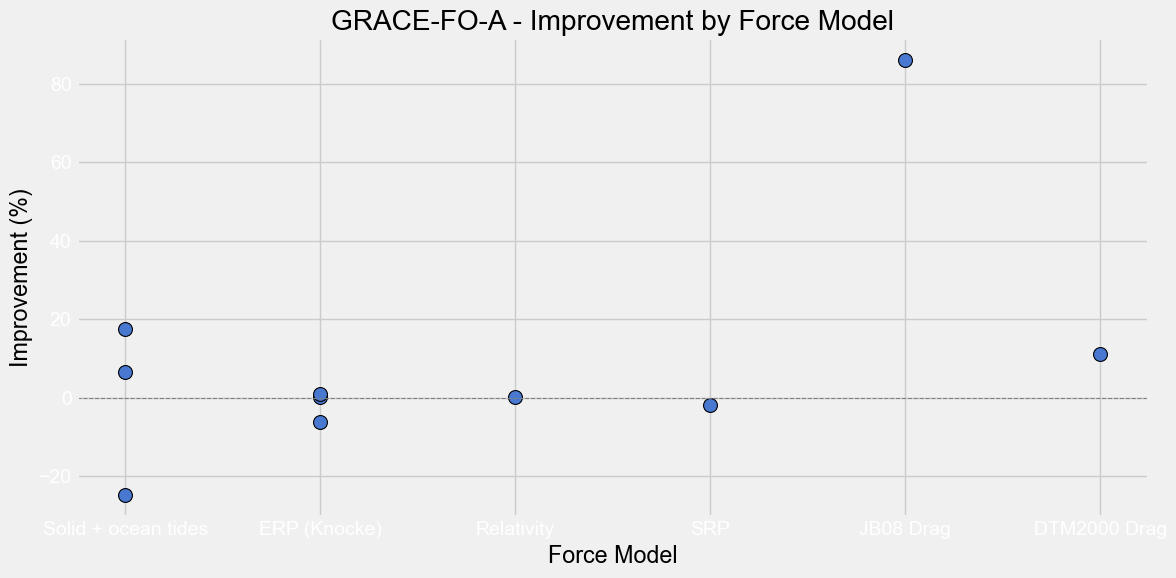

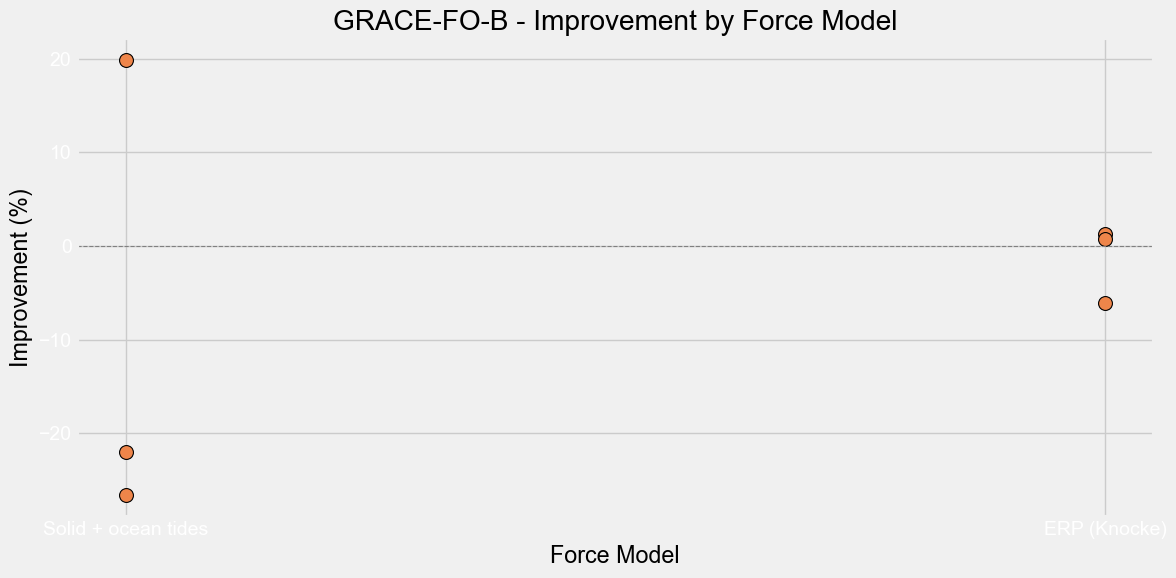

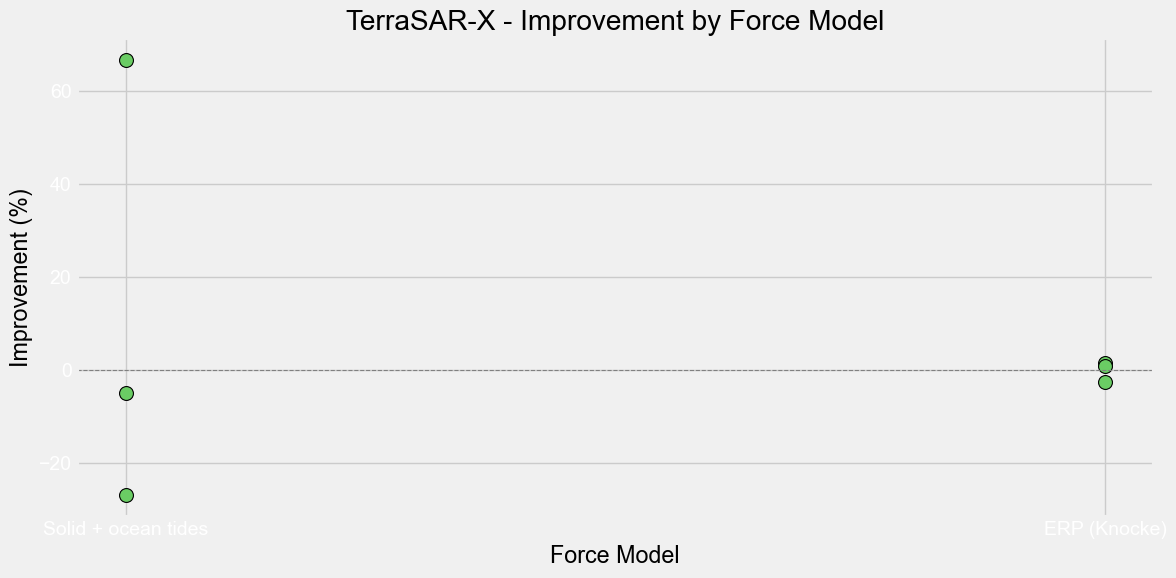

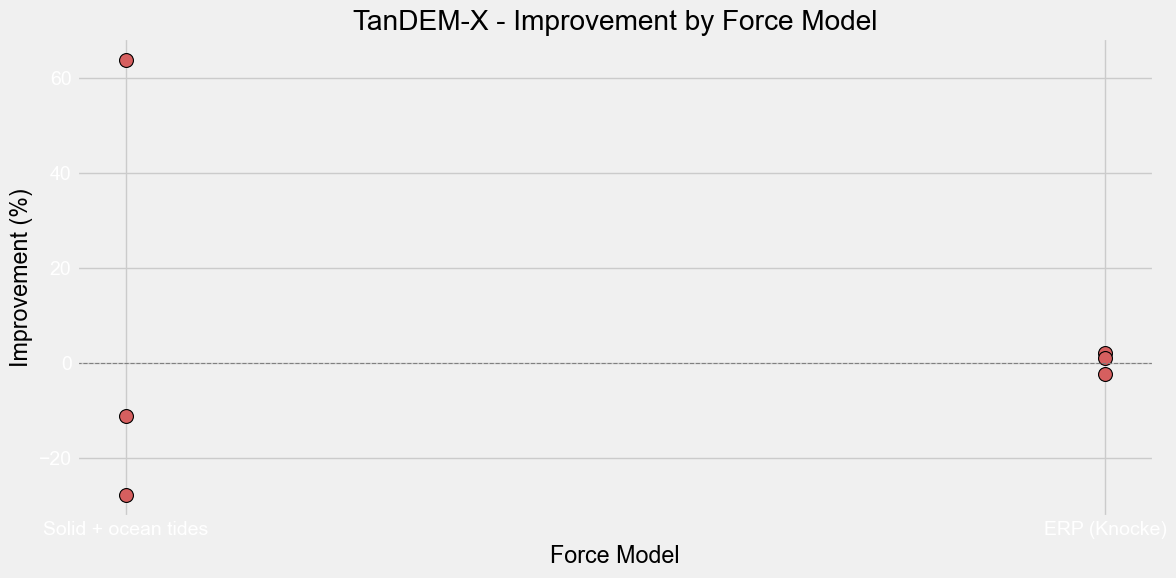

In [115]:
plt.style.use('fivethirtyeight')

force_model_labels = ['Solid + ocean tides', 'ERP (Knocke)', 'Relativity', 'SRP', 'JB08 Drag', 'DTM2000 Drag', 'NRLMSISE00 Drag']

for satellite in df_improvements['Satellite'].unique():
    satellite_df = df_improvements[df_improvements['Satellite'] == satellite]
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=satellite_df, x='Component_Added', y='Improvement', color=palette[sat_names_to_test.index(satellite)], s=100, edgecolor='black')
    # plt.xticks(rotation=45, color='black', labels=force_model_labels)
    plt.title(f'{satellite} - Improvement by Force Model', color='black')
    plt.xlabel('Force Model', color='black')
    plt.ylabel('Improvement (%)', color='black')
    plt.axhline(0, color='grey', lw=0.8, linestyle='--')
    plt.tight_layout()
    plt.show()


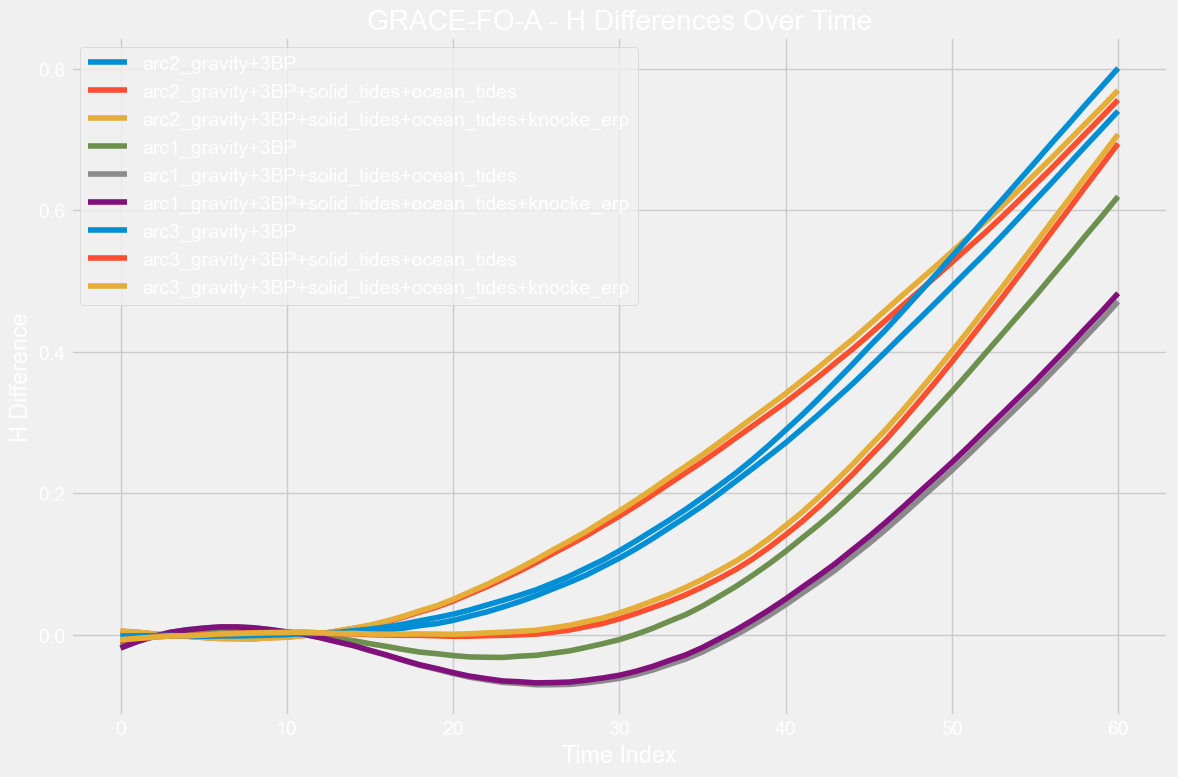

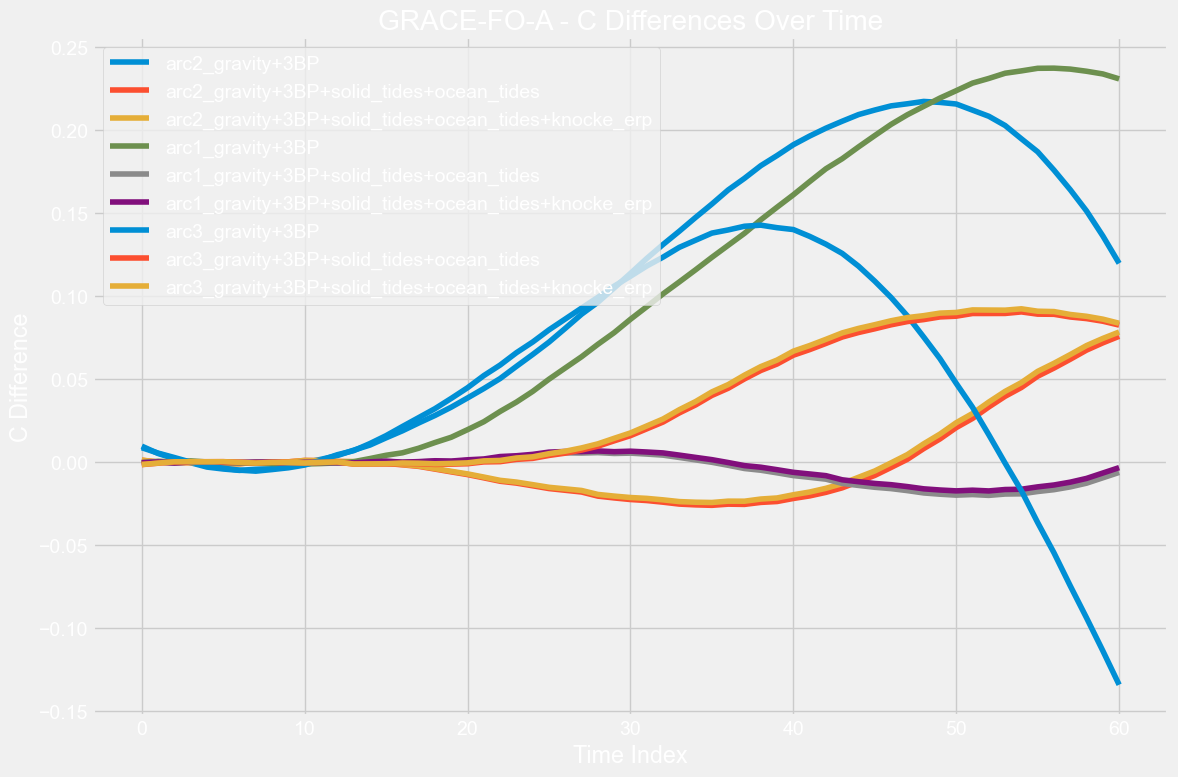

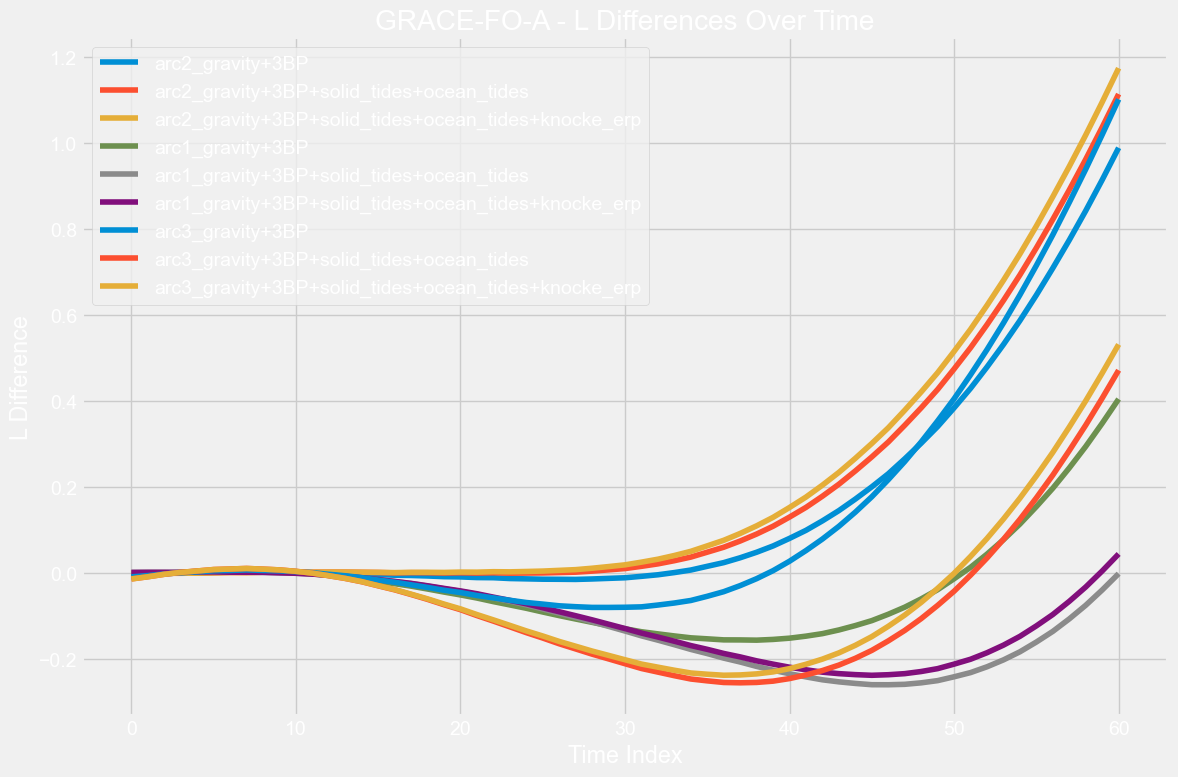

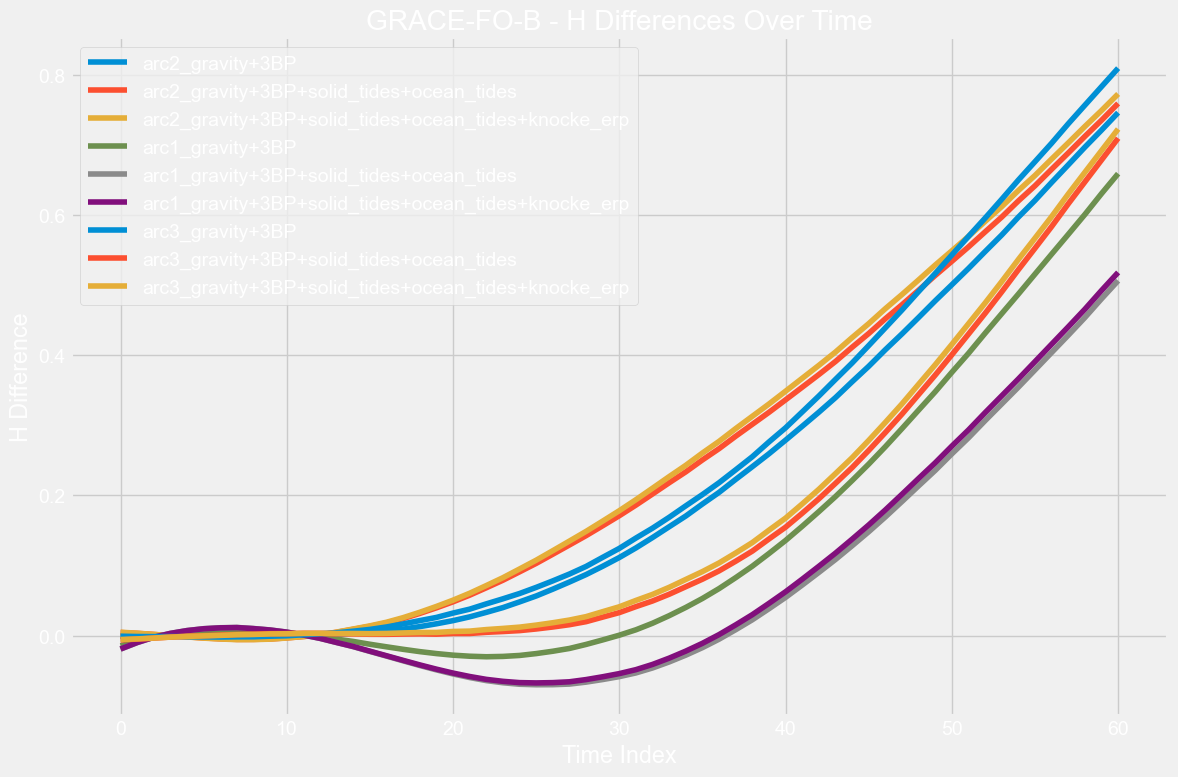

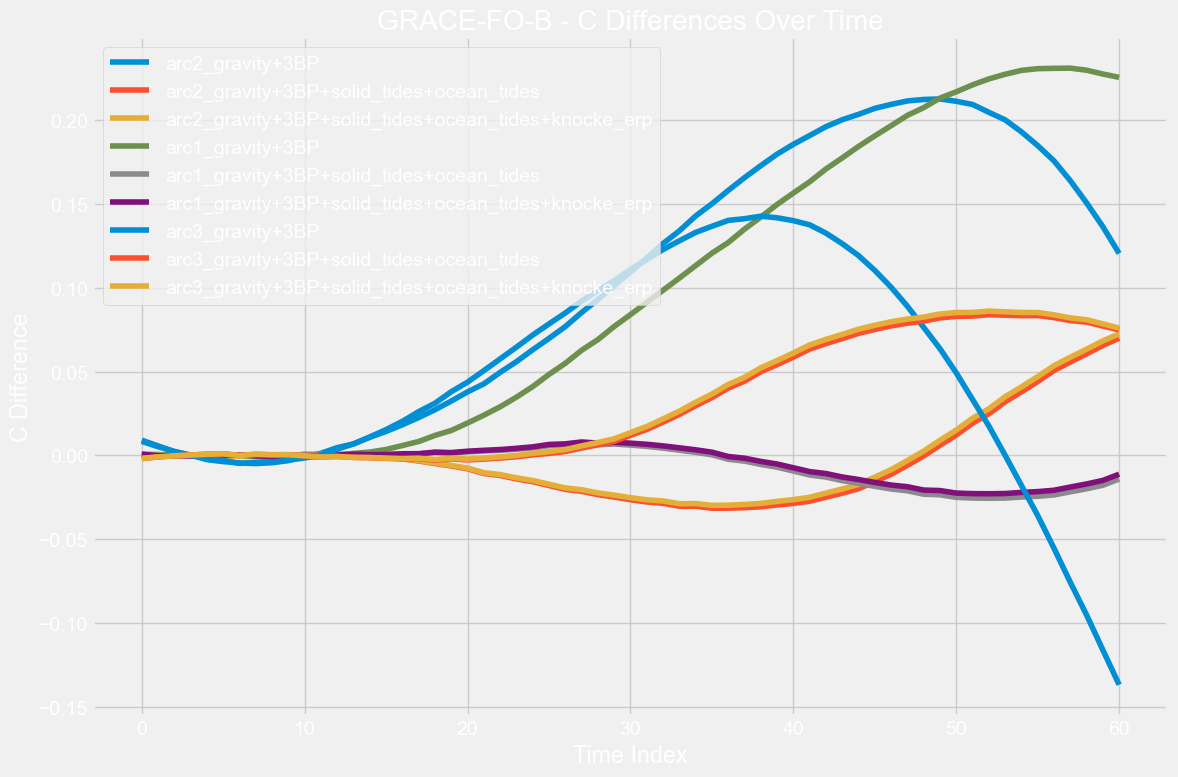

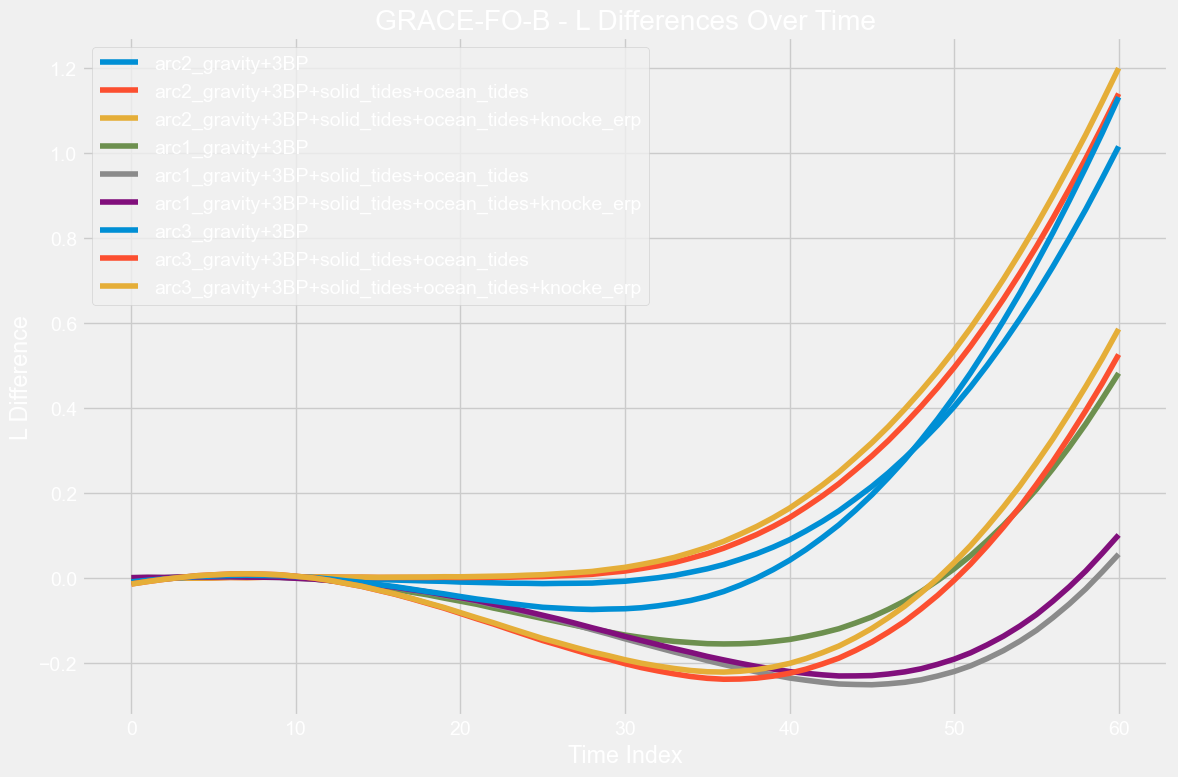

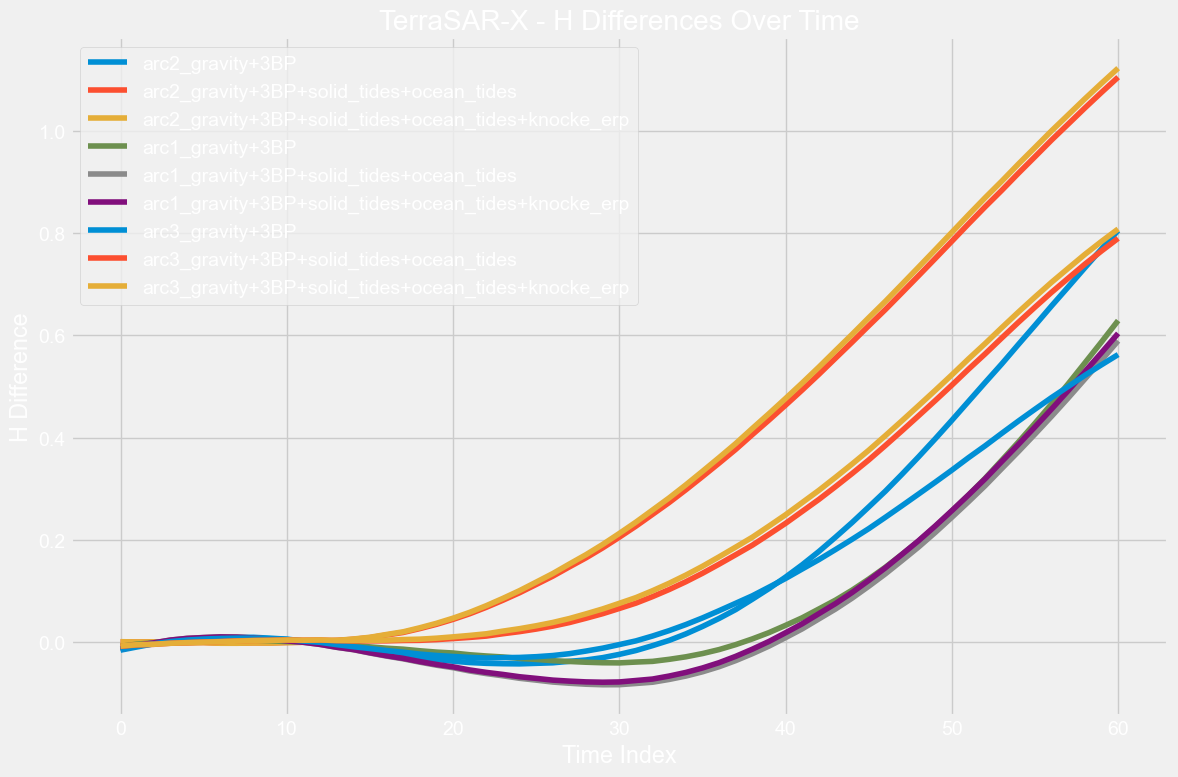

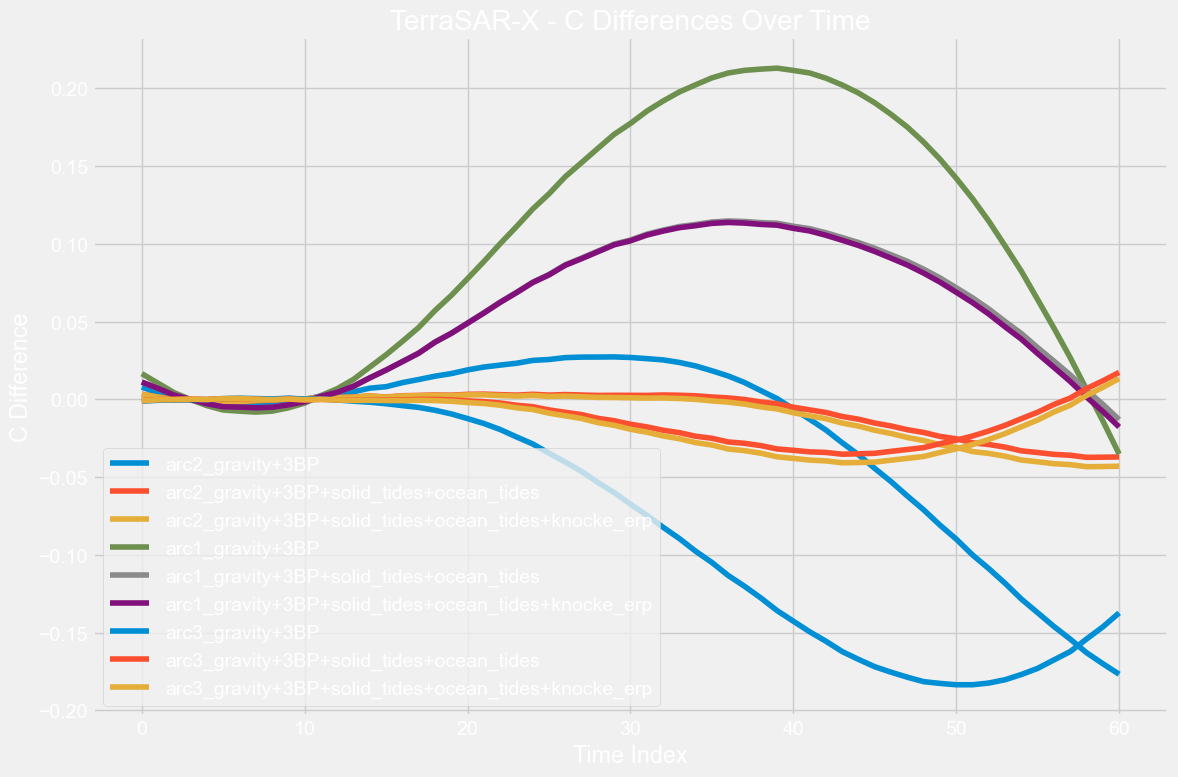

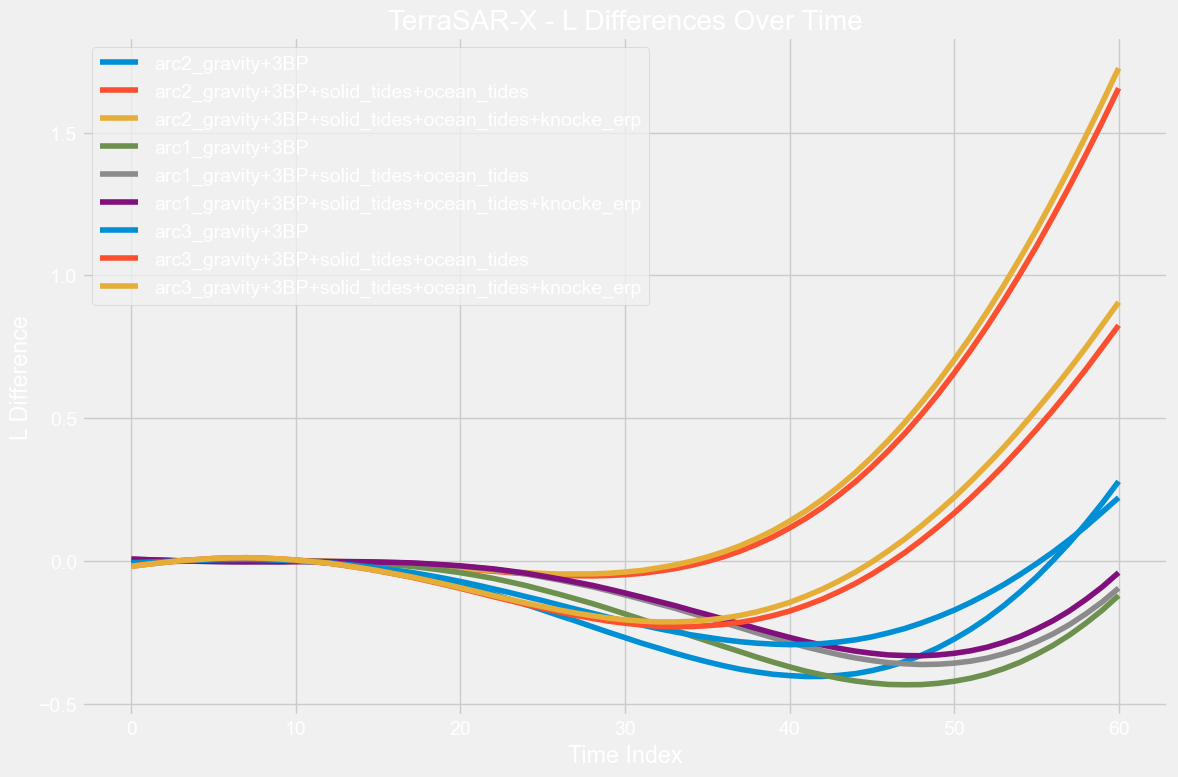

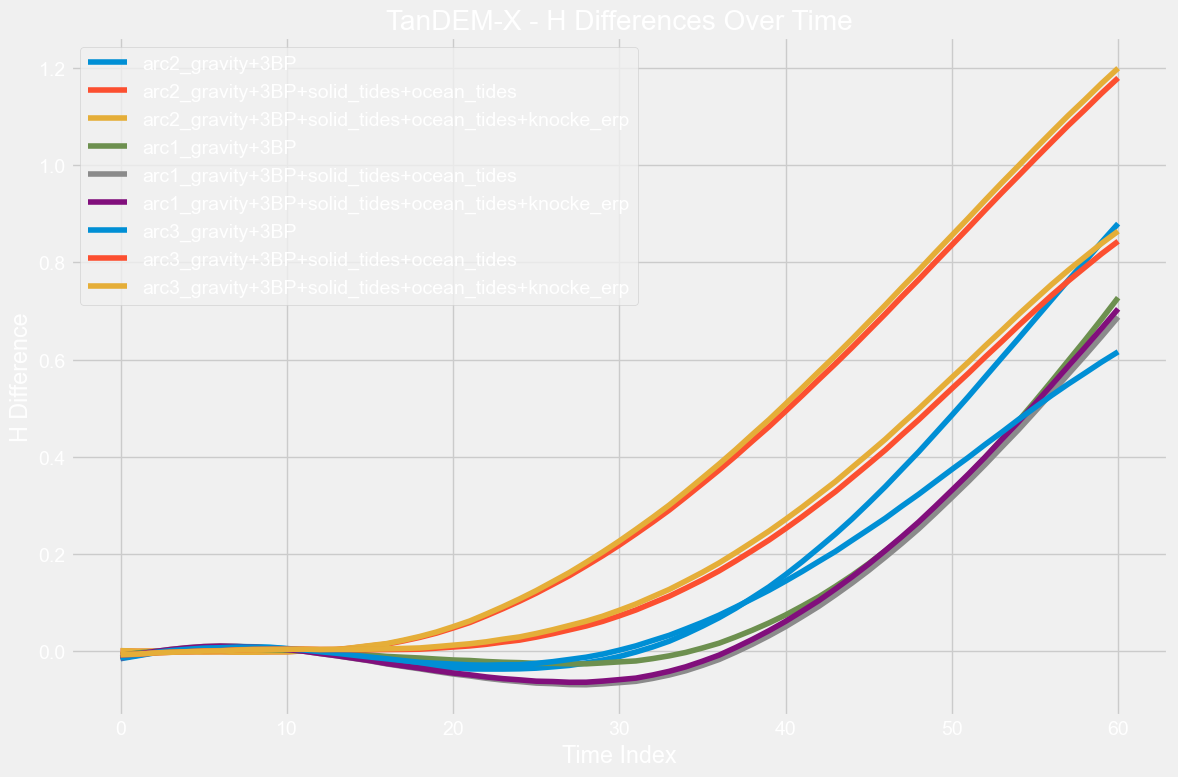

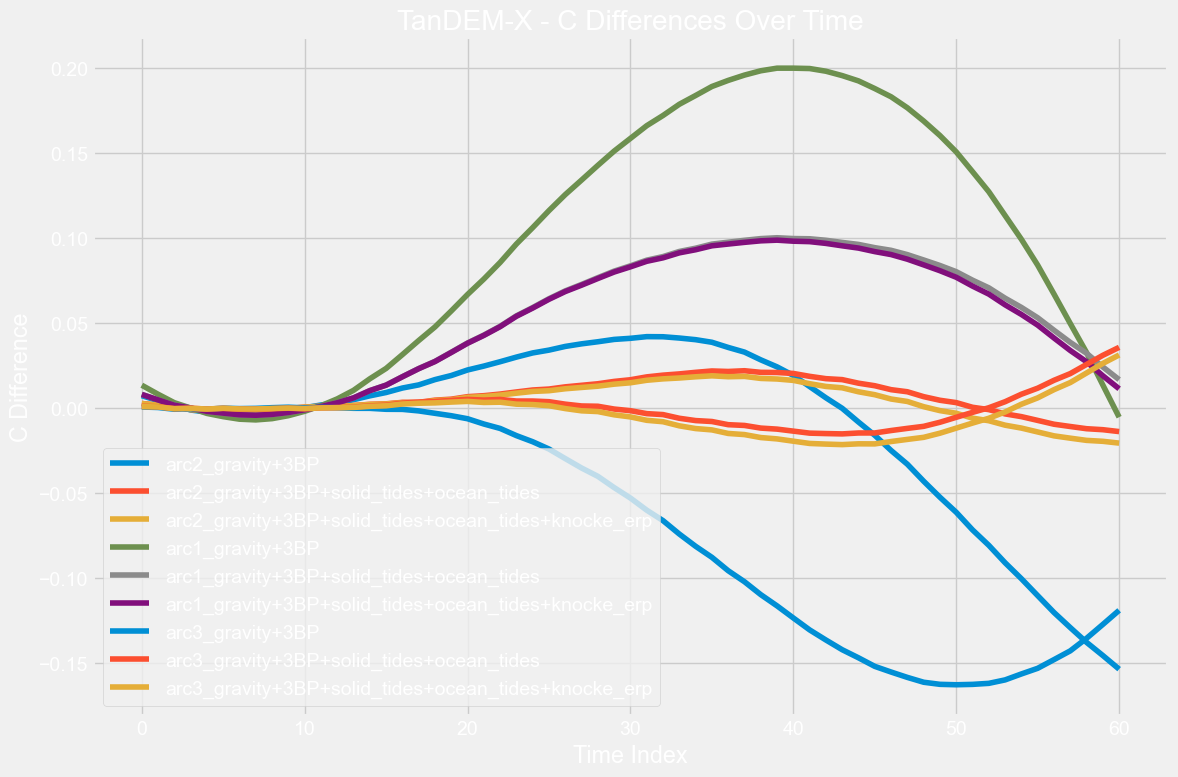

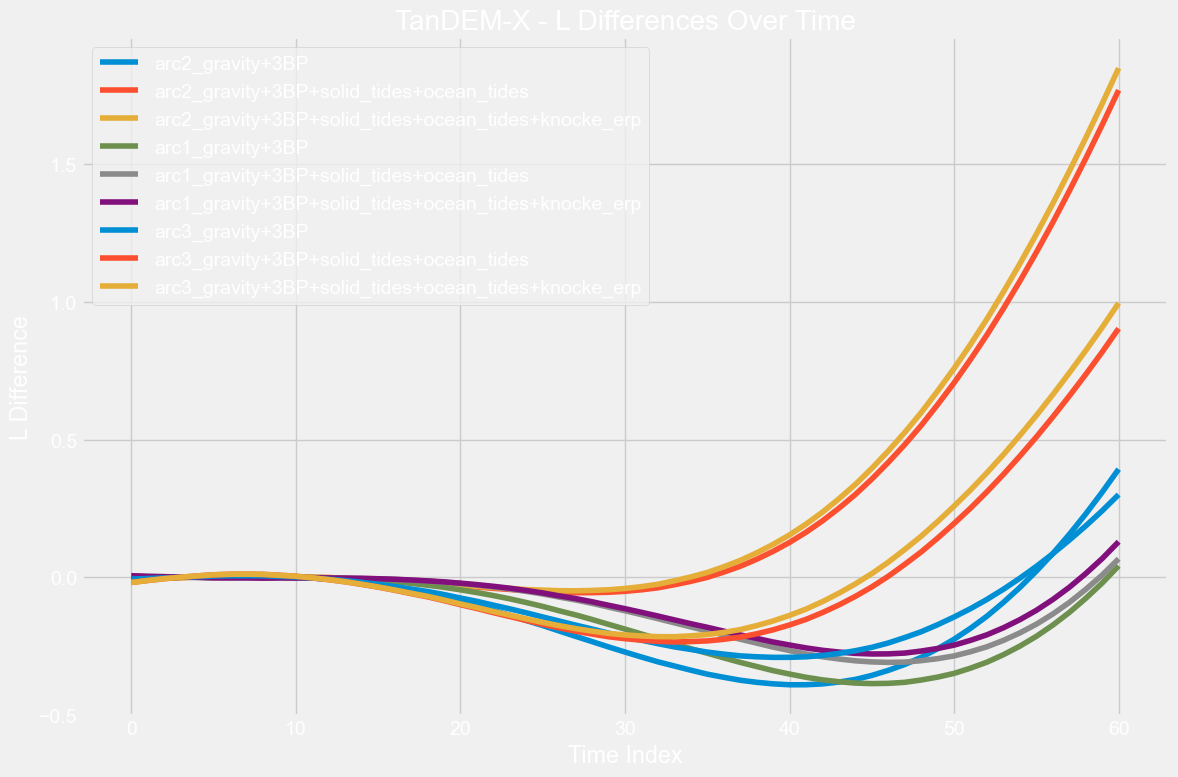

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

# Base folder path and satellite names
base_folder_path = "output/OD_BLS/Tapley/saved_runs"
sat_names_to_test = ["GRACE-FO-A", "GRACE-FO-B", "TerraSAR-X", "TanDEM-X"]
components = ['H', 'C', 'L']

# Iterate over satellites and components
for sat_name in sat_names_to_test:
    for component in components:
        # Initialize a figure for the current component of the current satellite
        plt.figure(figsize=(12, 8))
        
        # Collect all hcl_diffs files
        for root, dirs, files in os.walk(os.path.join(base_folder_path, sat_name)):
            for file in files:
                if file.endswith("_hcl_diffs.npy"):
                    # Extract the force model and arc index from the file name
                    match = re.search(r'fm(\d+)arc(\d+)', file)
                    if match:
                        fm_index, arc_index = match.groups()
                        hcl_diffs = np.load(os.path.join(root, file), allow_pickle=True).item()
                        
                        # For the current component, plot all differences
                        if component in hcl_diffs:
                            for config, diffs in hcl_diffs[component].items():
                                times = np.arange(len(diffs[0]))  # Assuming the first sublist is the correct one to plot
                                plt.plot(times, diffs[0], label=f'{config}')
        
        plt.title(f'{sat_name} - {component} Differences Over Time')
        plt.xlabel('Time Index')
        plt.ylabel(f'{component} Difference')
        plt.legend()
        plt.tight_layout()
        plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

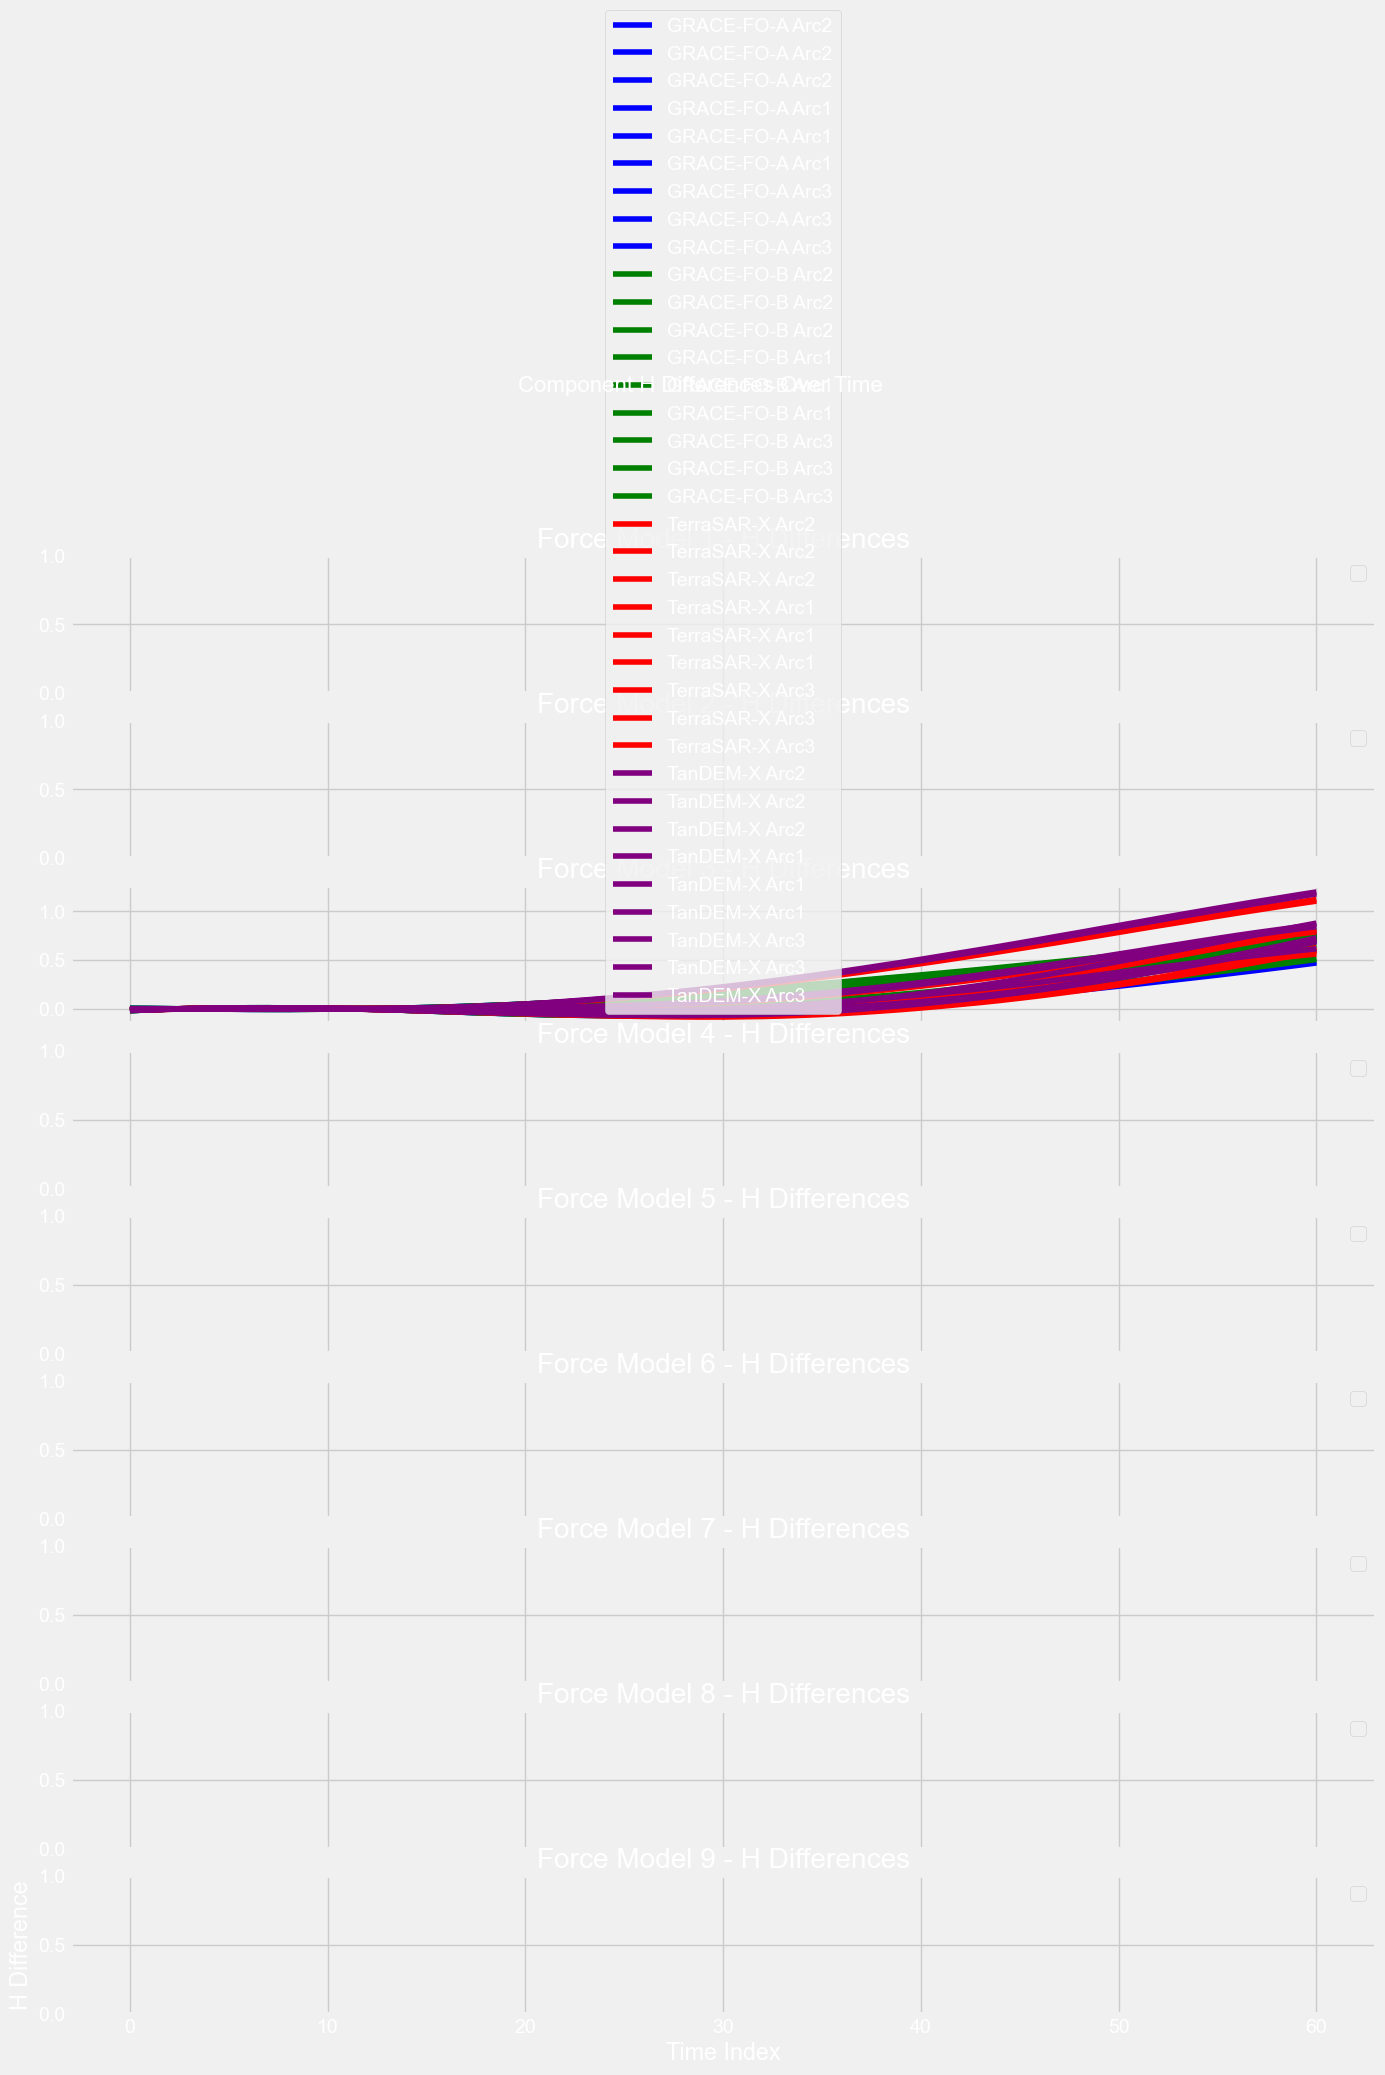

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

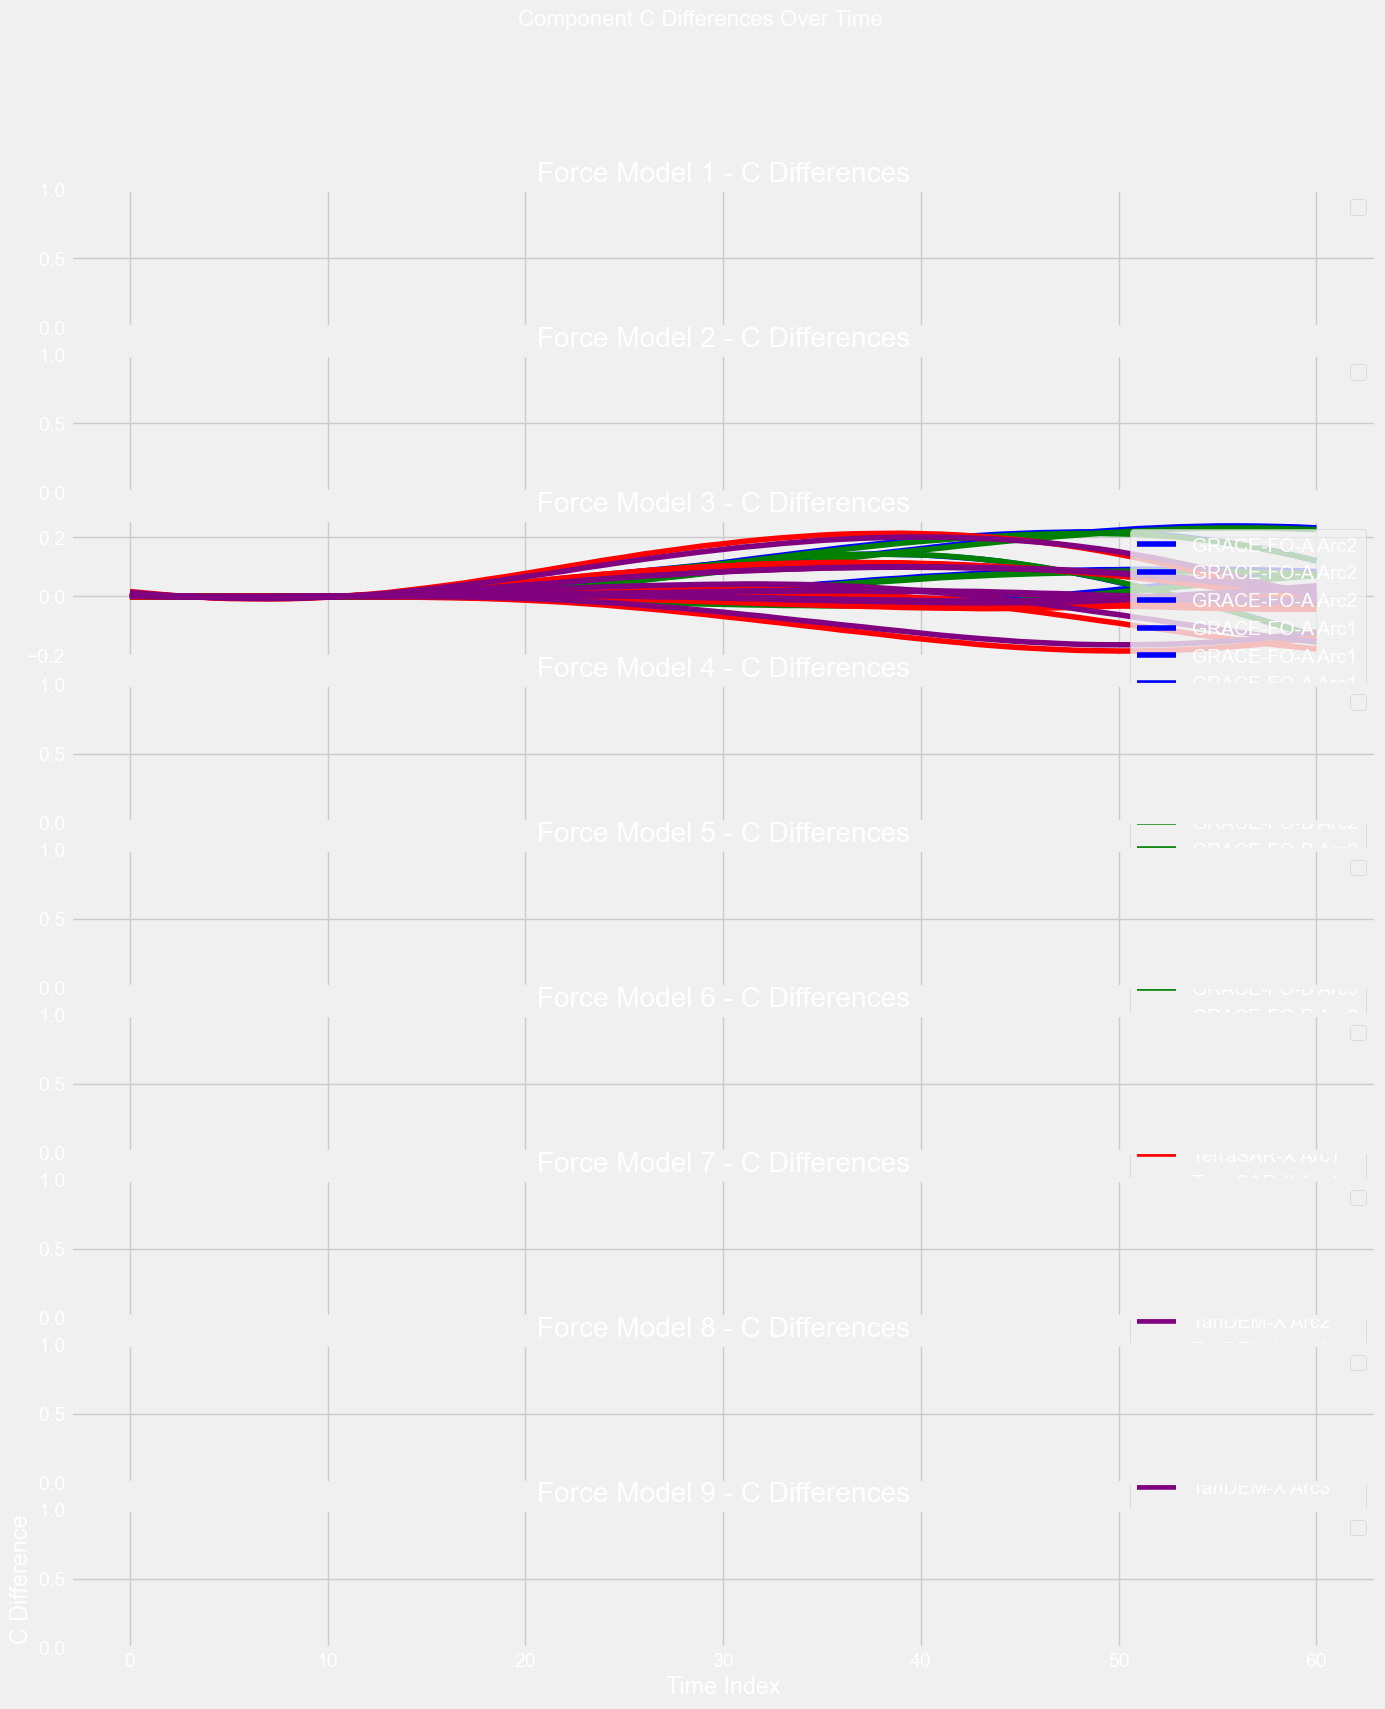

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

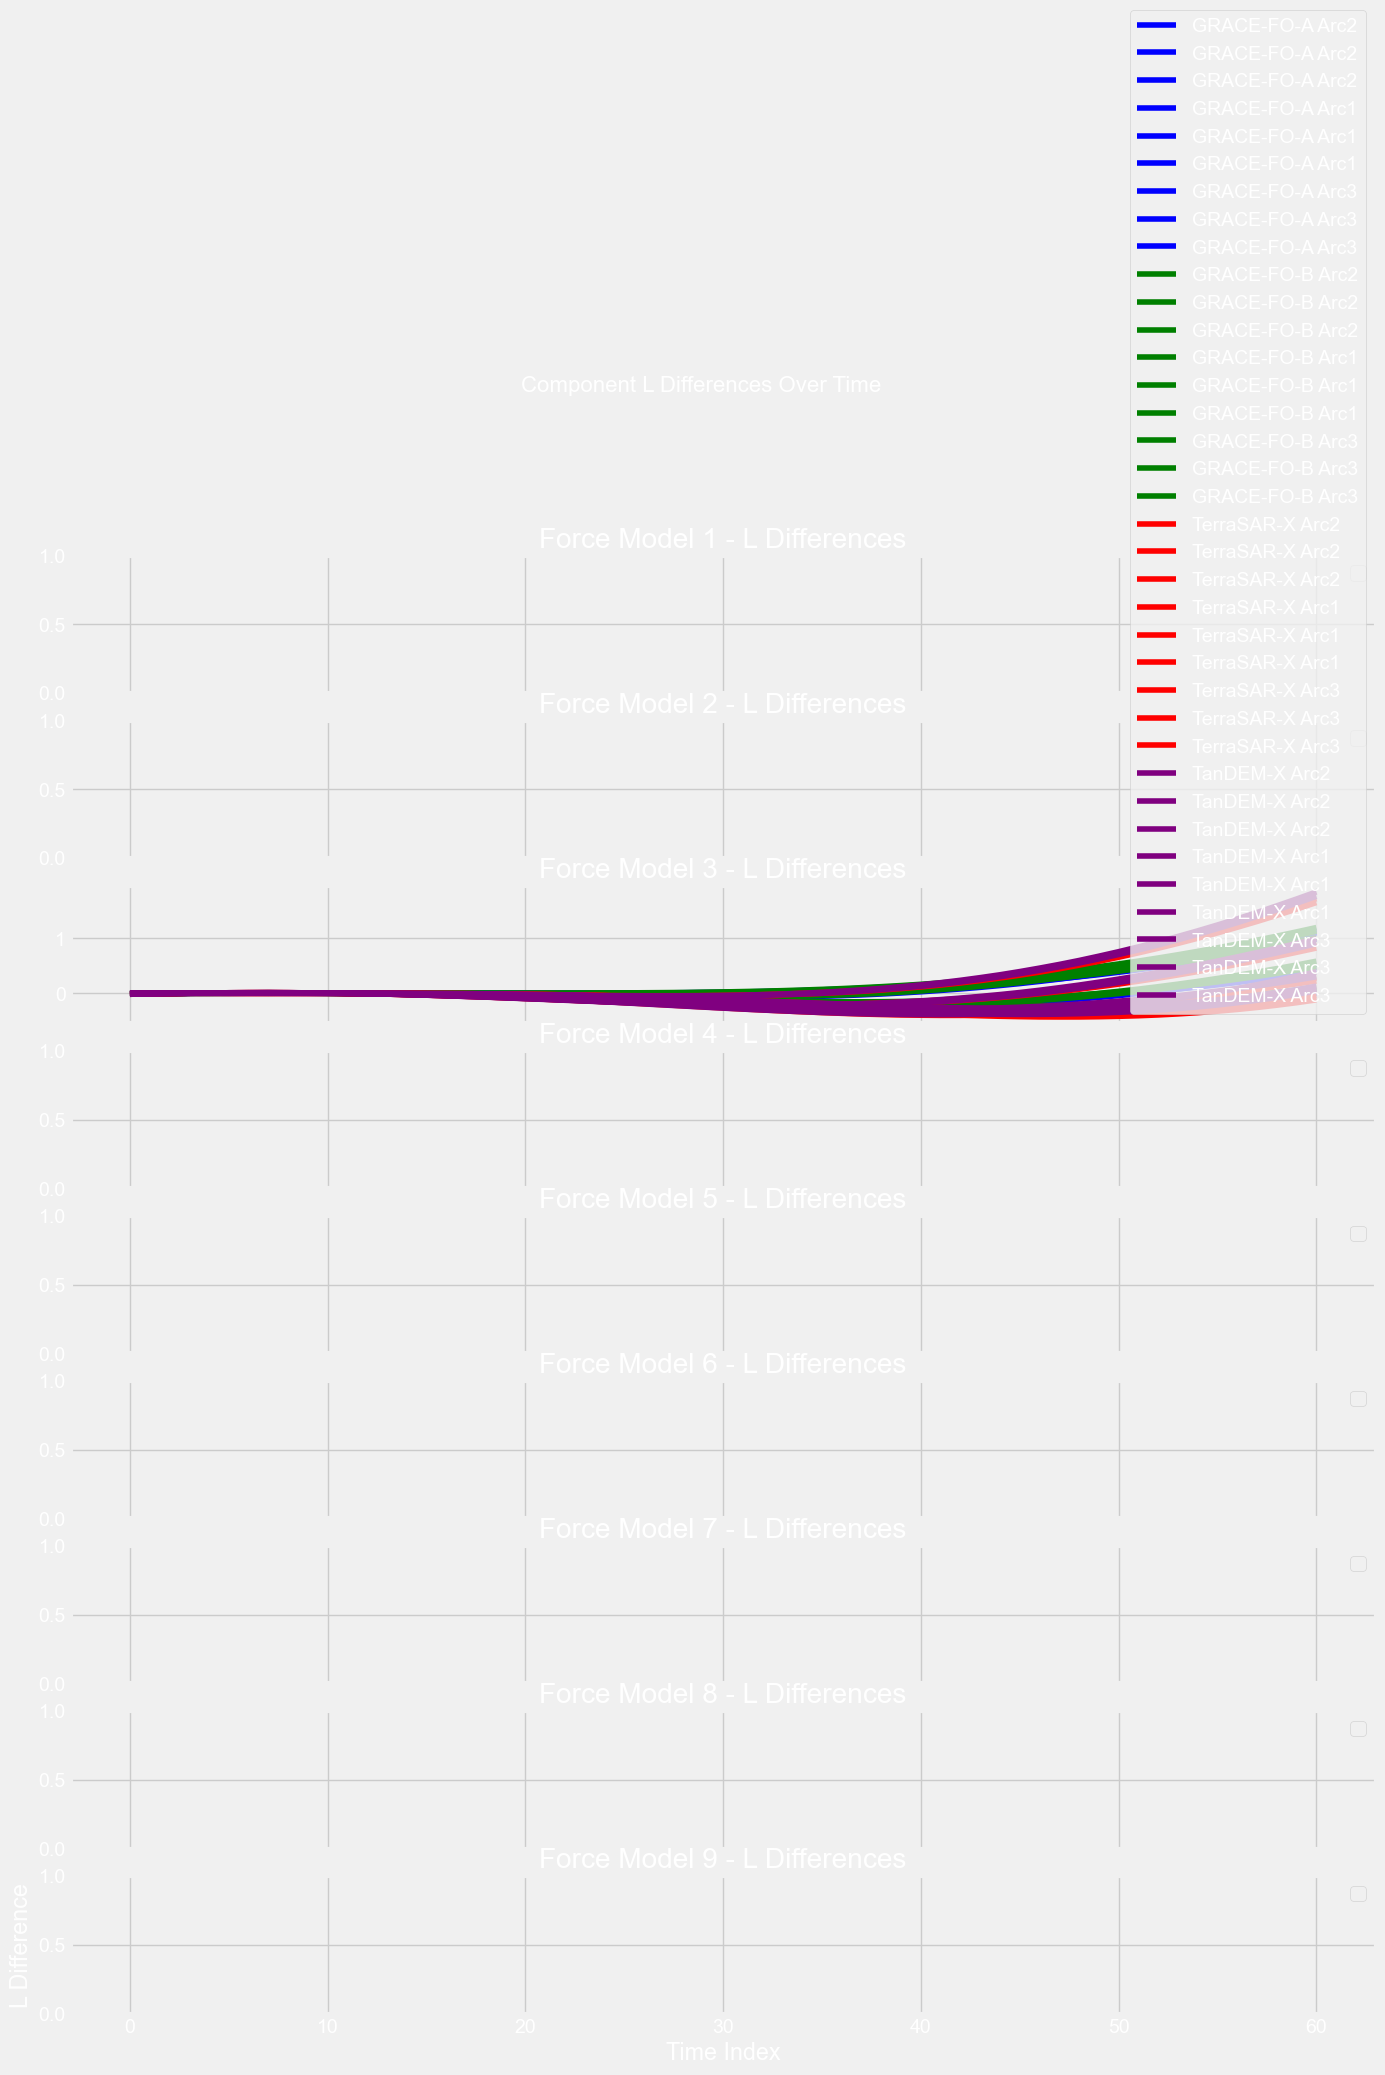

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

# Base folder path and satellite names
base_folder_path = "output/OD_BLS/Tapley/saved_runs"
sat_names_to_test = ["GRACE-FO-A", "GRACE-FO-B", "TerraSAR-X", "TanDEM-X"]
components = ['H', 'C', 'L']
sat_colors = {"GRACE-FO-A": "blue", "GRACE-FO-B": "green", "TerraSAR-X": "red", "TanDEM-X": "purple"}

# Function to extract force model and arc index from filename
def extract_fm_arc(filename):
    match = re.search(r'fm(\d+)arc(\d+)', filename)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

# Determine the total number of force model configurations
max_fm_index = 9  # Adjust based on your actual max force model index

# Iterate over components (H, C, L)
for component in components:
    # Create a figure with subplots for each force model configuration
    fig, axs = plt.subplots(max_fm_index, 1, figsize=(15, 2 * max_fm_index), sharex=True)

    # Normalize axs to always be iterable
    if max_fm_index == 1:
        axs = [axs]

    # Plot data
    for sat_name in sat_names_to_test:
        for root, dirs, files in os.walk(os.path.join(base_folder_path, sat_name)):
            for file in files:
                if file.endswith("_hcl_diffs.npy"):
                    fm_index, arc_index = extract_fm_arc(file)
                    if fm_index and arc_index:
                        hcl_diffs = np.load(os.path.join(root, file), allow_pickle=True).item()
                        if component in hcl_diffs:
                            for config, diffs in hcl_diffs[component].items():
                                # Iterate over each configuration's data points
                                for data in diffs:
                                    times = np.arange(len(data))
                                    axs[fm_index - 1].plot(times, data, label=f'{sat_name} Arc{arc_index}', color=sat_colors[sat_name])

    # Customize subplot titles and legend
    for i, ax in enumerate(axs):
        ax.set_title(f'Force Model {i + 1} - {component} Differences')
        ax.legend(loc='best')
    
    # Super title and labels
    plt.suptitle(f'Component {component} Differences Over Time', fontsize=16)
    plt.xlabel('Time Index')
    plt.ylabel(f'{component} Difference')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
